In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from exod.xmm.bad_obs import obsids_to_exclude
from exod.post_processing.rotate_regions import rotate_regions_to_detector_coords, plot_regions_detector_coords, hot_regions_5s
from exod.utils.plotting import use_scienceplots
use_scienceplots()

/home/nkhan/EXOD2/data/results_combined/transients_rotated.csv already exists.
           obsid                      runid  label       angle             X  \
0      911990501     0911990501_0_5_0.2_2.0      0   43.801613  16074.418605   
1      911990501     0911990501_0_5_0.2_2.0      1   43.801613  19289.302326   
2      911990501     0911990501_0_5_0.2_2.0      2   43.801613  21298.604651   
3      911990501     0911990501_0_5_0.2_2.0      3   43.801613  32952.558140   
4      911990501     0911990501_0_5_0.2_2.0      4   43.801613  34560.000000   
...          ...                        ...    ...         ...           ...   
59449  932391001  0932391001_0_200_0.2_12.0      0  103.350810  23099.414029   
59450  932391001  0932391001_0_200_0.2_12.0      1  103.350810  21700.465116   
59451  932391001  0932391001_0_200_0.2_12.0      2  103.350810  22504.186047   
59452  932391001  0932391001_0_200_0.2_12.0      3  103.350810  24915.348837   
59453  932391001  0932391001_0_200_0.2_12

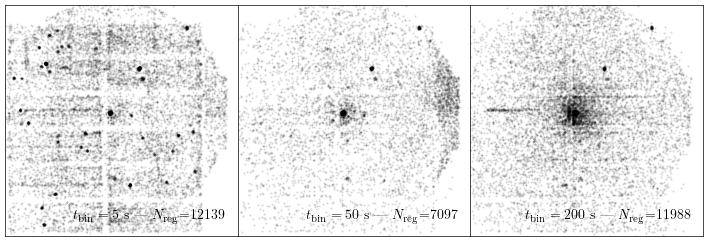

In [2]:
df_regions_rotated = rotate_regions_to_detector_coords(clobber=False)
plot_regions_detector_coords(df_regions_rotated)

In [25]:
hot_regions_5s = [(  9536.02,  13601.21,  588.91,  600.74),  # 1
                  (-12633.42,  10837.71,  399.99,  585.98),  # 2
                  (-16385.08,   6131.49,  399.74,  675.02),  # 3
                  (  2326.62,   7454.90,  677.92,  823.48),  # 4
                  (-15344.51,   1375.52,  203.55,  515.18),  # 5
                  (-14184.01,   -636.23,  341.17,  594.07),  # 6
                  (  2821.32,   5936.04,  763.81,  841.08),  # 7
                  (-11605.95,   8403.36,  394.28,  537.49),  # 8
                  (-12244.45,   7892.09,  336.98,  616.15),  # 9
                  (-11022.03,   7131.74,  402.47,  694.80),  # 10
                  (-11063.07,  12741.59,  426.35,  544.85),  # 11
                  (  1320.53,    555.66,  367.11,  544.62),  # 12
                  (  8468.08,  -2409.62,  243.78,  417.05),  # 13
                  ( 10592.09,  -2256.85,  332.32, 1273.23),  # 14
                  (  6629.57,  -9682.14,  331.13,  550.60),  # 15
                  (  1034.69, -10353.72,  471.91, 1011.96),  # 16
                  (-12251.02, -13606.78,  578.03, 1034.96),  # 17
                  (-11801.35, -16049.66,  338.45,  567.11),  # 18
                  ( -1257.66,  -9323.60,  557.89, 1019.55),  # 19
                  (-10351.30, -11477.23,  695.08,  706.53),  # 20
                  ( -5641.13,  -2382.69,  456.12,  891.63),  # 21
                  (  3093.50,  -2880.54,  369.33,  602.12),  # 22
                  ( -5273.71,  -4844.67,  230.06,  708.37),  # 23
                  ( -6213.36,  -4207.98,  258.50,  501.76),  # 24
                  ( -9871.15,  -2761.79,  568.74, 1024.15),  # 25
                  ( -9829.22,  -3528.73,  448.17,  565.85),  # 26
                  ( -9935.49,  13451.52,  446.67,  492.18),  # 27
                  ( -9822.95,  10157.08,  388.11,  655.86),  # 28
                  ( -9313.35,  10880.79,  462.36,  673.95),  # 29
                  ( -8152.75,  11015.41,  431.12,  817.62),  # 30
                  ( 10832.99,  -8089.06,  370.52,  780.13),  # 31
                  (  7547.46,  -4793.52,  396.51,  398.04),  # 32
                  (  4804.20,  -5489.96,  341.22,  823.52),  # 33
                  ( 11291.97,  11334.69,  296.41,  600.34),  # 34
                  (-15119.26,   6126.88,  365.35,  544.16)]  # 35


(-17500.0, 17500.0)

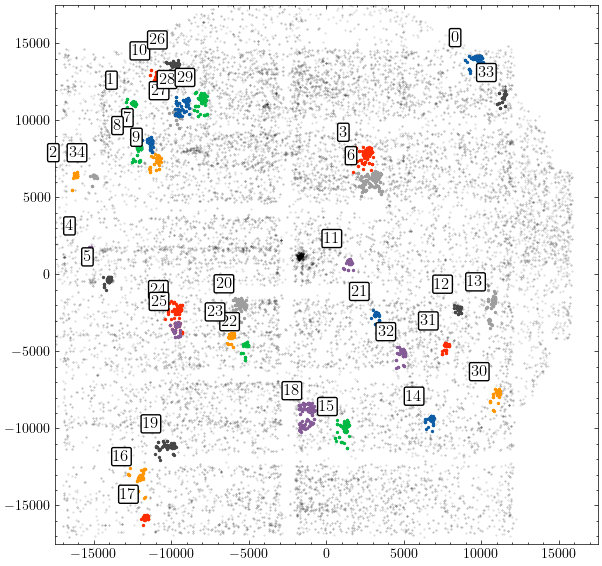

In [28]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(sub['X_EPIC'], sub['Y_EPIC'], s=0.5, marker='.', color='black', alpha=0.2)
for i, (x,y,w,h) in enumerate(hot_regions_5s):
    mask = (sub['X_EPIC'] < x+w) & (sub['X_EPIC'] > x-w) & (sub['Y_EPIC'] < y+h) & (sub['Y_EPIC'] > y-h)
    sub2 = sub[mask]
    n_reg = len(sub2)
    n_obs = len(sub2['obsid'].unique())
    
    #print(f'{n_reg} / {n_obs} = {n_obs/n_reg:.2f}')
    
    ax.scatter(sub2['X_EPIC'], sub2['Y_EPIC'], s=2, alpha=1.0)
    offset = 1500
    ax.text(x-offset,y+offset,s=i, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1')) 
ax.set_xlim(-17500, 17500)
ax.set_ylim(-17500, 17500)

In [12]:
h

544.16